In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline


In [2]:
sjo_file = "autosaveSJO.graphml"

In [3]:
SJO = nx.read_graphml(sjo_file)
print(list(SJO.nodes(data=True))[0:5])

[('100', {'label': '<Scarlett_Johansson>', 'bipartite': 0, '_depth': 0, '_expanded': 1, 'gender': 'male'}), ('101', {'label': '<The_Horse_Whisperer_(film)>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 60000000.0, 'budget': 186883563.0}), ('102', {'label': '<The_Nanny_Diaries_(film)>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 20000000.0, 'budget': 47738099.0}), ('103', {'label': '<Eight_Legged_Freaks>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 30000000.0, 'budget': 45867333.0}), ('104', {'label': '<Avengers:_Age_of_Ultron>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 316000000.0, 'budget': 1405000000.0})]


In [4]:
movies = [node for node, nodedata in SJO.nodes(data=True) if nodedata['bipartite'] == 1]

In [5]:
movieProjection = nx.bipartite.weighted_projected_graph(SJO, movies)
filtered = nx.Graph(movieProjection)

to_remove = [(n1, n2) for n1,n2,data in movieProjection.edges(data=True) if data['weight'] < 2]
filtered.remove_edges_from(to_remove)
giant_cc_nodes = max(nx.connected_components(filtered), key = len)
filtered2 = filtered.subgraph(giant_cc_nodes)
labels = {nodeId:data['label'] for nodeId, data in filtered2.nodes(data=True)}

#remove 0 budget



In [6]:
filtered3 = filtered2.copy()

print(len(filtered2.nodes(data=True)))
NanMovies = [n1 for n1, data in filtered2.nodes(data=True) if np.isnan(data['gross']) or np.isnan(data['budget'])]
#len(NanMovies)

filtered3.remove_nodes_from(NanMovies)


341


In [7]:
print(len(filtered2 ) == len(filtered3))

False


In [8]:
movies = [(node,nodedata) for node, nodedata in filtered3.nodes(data=True) if nodedata['bipartite'] == 1]


In [9]:
names = {movie:data['label'] for movie, data in movies}
names

{'942': '<Nymphomaniac_(film)>',
 '645': '<The_Legend_of_Tarzan_(film)>',
 '295': '<The_Jungle_Book_(1994_film)>',
 '1279': '<Lars_and_the_Real_Girl>',
 '1071': '<The_Best_Exotic_Marigold_Hotel>',
 '1475': '<Soldiers_of_Fortune_(film)>',
 '910': '<Creation_(2009_film)>',
 '502': '<The_Mothman_Prophecies_(film)>',
 '822': '<Devil_in_a_Blue_Dress_(film)>',
 '629': '<Big_Game_(2014_film)>',
 '1404': '<Emma_(1996_theatrical_film)>',
 '1336': '<Home_on_the_Range_(2004_film)>',
 '912': '<Transcendence_(2014_film)>',
 '1329': '<Armageddon_(1998_film)>',
 '1242': "<Captain_Corelli's_Mandolin_(film)>",
 '1054': '<Little_Boy_(film)>',
 '1131': '<Outbreak_(film)>',
 '431': '<Four_Weddings_and_a_Funeral>',
 '1051': '<Michael_Clayton_(film)>',
 '776': '<Zodiac_(film)>',
 '497': '<Love_Actually>',
 '1129': '<Edison_(film)>',
 '745': '<Supernova_(2000_film)>',
 '1351': '<Domestic_Disturbance>',
 '1003': '<A_Christmas_Carol_(2009_film)>',
 '534': '<12_Years_a_Slave_(film)>',
 '654': '<Jumper_(2008_fil

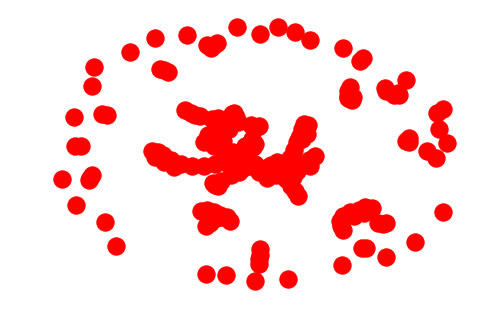

In [10]:
nx.set_node_attributes(filtered3, names, name = "Names")


nx.draw(filtered3)

nx.write_graphml(filtered3, "ScarlettJMOVIESFiltered.graphml")
